# Kernel density estimation

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
import numpy as np

from collections import OrderedDict
from statsmodels.nonparametric.kde import KDEUnivariate

from lint.models import Token

def token_density(token, bw=2, corpus=None):
    
    # Get the raw token series.
    series = Token.token_series(token, corpus)
    
    # Use the raw counts as weights.
    weights = np.array(list(series.values()), dtype=float)

    # Estimate density.
    density = KDEUnivariate(list(series.keys()))
    density.fit(weights=weights, bw=bw, fft=False)
    
    return density

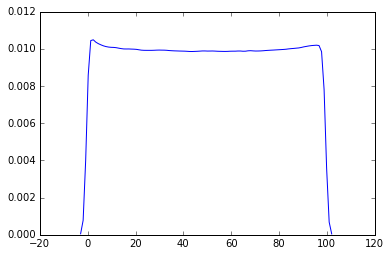

In [10]:
density = token_density('the', bw=1)
plt.plot(density.support, density.density)
plt.show()

# Savgol filter

In [4]:
from scipy.signal import savgol_filter

def savgol_series(token, window=15, order=2, *args, **kwargs):
    
    # Get the raw token series.
    series = Token.token_series(token, *args, **kwargs)
    
    # Total token count.
    total_count = sum(series.values())
    
    # By default, 0s in all bins.
    f_obs = np.zeros(100)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    return savgol_filter(f_obs, window, order)

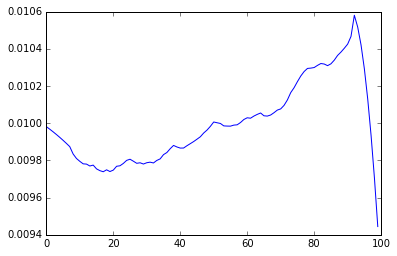

In [43]:
series = savgol_series('had', year1=1900, year2=1960)

plt.plot(series)
plt.show()

In [21]:
from scipy.integrate import trapz

print(trapz(series))

0.989915396588


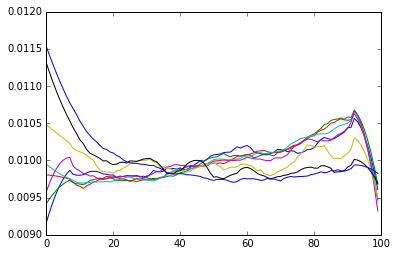

In [45]:
for y in range(1840, 2000, 20):
    series = savgol_series('had', year1=y, year2=y+20)
    plt.plot(series)

plt.show()

In [88]:
def plot_time_slices(token, year1=1840, year2=2000, window=20, *args, **kwargs):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    cm = plt.get_cmap('Blues')
    
    slices = range(year1, year2, window)
    
    colors = [
        cm(1.*i/len(slices))
        for i in range(len(slices))
    ]
    
    ax.set_color_cycle(colors)
    
    for y in range(year1, year2, window):
        
        series = savgol_series(token, year1=y, year2=y+window, *args, **kwargs)
        ax.plot(series)
        
    print(token)
    plt.show()

had


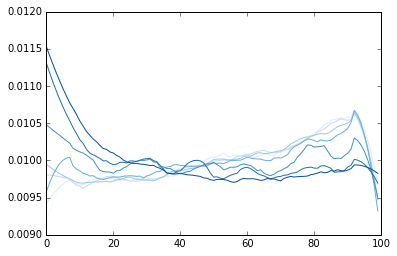

In [107]:
plot_time_slices('had')